In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [2]:
#Load the data
bikes_df =pd.read_csv('day.csv')
bikes_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
bikes_df.shape
bikes_df_mod= bikes_df.drop(['dteday', 'instant','temp','atemp','hum','windspeed','cnt','casual'], axis=1) #remove irrelevant and collinear variables

In [4]:
np.where(pd.isnull(bikes_df_mod)) #check for missing values

(array([], dtype=int64), array([], dtype=int64))

In [5]:
bikes_df_mod.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,registered
0,1,0,1,0,6,0,2,654
1,1,0,1,0,0,0,2,670
2,1,0,1,0,1,1,1,1229
3,1,0,1,0,2,1,1,1454
4,1,0,1,0,3,1,1,1518


#Weekends have fewer registered users than weekdays.

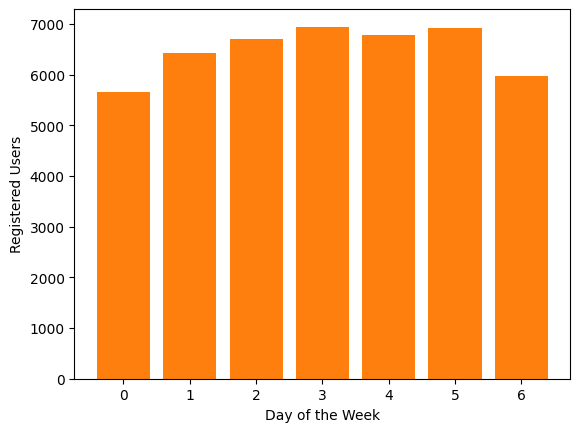

In [7]:
#Plot total registered users during 2011 and 2012 for each day of the week
fig, ax = plt.subplots()
ax.bar(bikes_df_mod['weekday'], bikes_df_mod['registered'], color=['C1'])
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Registered Users')
plt.show()

In [8]:
#Inspect the data for outliers
#Sort by each of the variables

In [9]:
bikes_df_mod.sort_values(by=['registered']) 

,season,yr,mnth,holiday,weekday,workingday,weathersit,registered
667,4,1,10,0,1,1,3,20
26,1,0,1,0,4,1,1,416
725,1,1,12,0,3,1,3,432
358,1,0,12,0,0,0,1,451
25,1,0,1,0,3,1,3,472
...,...,...,...,...,...,...,...,...
641,4,1,10,0,3,1,2,6844
662,4,1,10,0,3,1,1,6898
648,4,1,10,0,3,1,1,6911
629,3,1,9,0,5,1,1,6917


In [10]:
bikes_df_mod.sort_values(by=['season'])

,season,yr,mnth,holiday,weekday,workingday,weathersit,registered
0,1,0,1,0,6,0,2,654
382,1,1,1,0,3,1,1,3267
383,1,1,1,0,4,1,1,3162
384,1,1,1,0,5,1,2,3048
385,1,1,1,0,6,0,2,1234
...,...,...,...,...,...,...,...,...
326,4,0,11,0,3,1,2,2454
327,4,0,11,1,4,0,1,935
328,4,0,11,0,5,1,1,1697
308,4,0,11,0,6,0,1,2770


In [11]:
bikes_df_mod.sort_values(by=['mnth'])

,season,yr,mnth,holiday,weekday,workingday,weathersit,registered
0,1,0,1,0,6,0,2,654
368,1,1,1,0,3,1,2,2273
369,1,1,1,0,4,1,1,3132
370,1,1,1,0,5,1,1,3791
371,1,1,1,0,6,0,1,3451
...,...,...,...,...,...,...,...,...
361,1,0,12,0,3,1,1,2047
362,1,0,12,0,4,1,1,2169
363,1,0,12,0,5,1,1,2508
350,4,0,12,0,6,0,2,2464


In [12]:
bikes_df_mod.sort_values(by=['holiday'])

,season,yr,mnth,holiday,weekday,workingday,weathersit,registered
0,1,0,1,0,6,0,2,654
479,2,1,4,0,2,1,1,5115
480,2,1,4,0,3,1,1,5541
481,2,1,4,0,4,1,2,4551
482,2,1,4,0,5,1,1,5219
...,...,...,...,...,...,...,...,...
611,3,1,9,1,1,0,1,4069
282,4,0,10,1,1,0,1,3603
149,2,0,5,1,1,0,1,2549
104,2,0,4,1,5,0,1,2484


In [13]:
bikes_df_mod.sort_values(by=['workingday'])

,season,yr,mnth,holiday,weekday,workingday,weathersit,registered
0,1,0,1,0,6,0,2,654
372,1,1,1,0,0,0,1,2826
371,1,1,1,0,6,0,1,3451
366,1,1,1,1,1,0,1,1707
729,1,1,12,0,0,0,1,1432
...,...,...,...,...,...,...,...,...
361,1,0,12,0,3,1,1,2047
360,1,0,12,0,2,1,2,1059
117,2,0,4,0,4,1,2,3489
356,1,0,12,0,5,1,1,2046


In [14]:
bikes_df_mod.sort_values(by=['weathersit'])

,season,yr,mnth,holiday,weekday,workingday,weathersit,registered
365,1,1,1,0,0,0,1,1608
590,3,1,8,0,1,1,1,5676
591,3,1,8,0,2,1,1,5656
352,4,0,12,0,1,1,1,3143
351,4,0,12,0,0,0,1,2211
...,...,...,...,...,...,...,...,...
324,4,0,11,0,1,1,3,2545
325,4,0,11,0,2,1,3,1538
89,2,0,3,0,4,1,3,1506
249,3,0,9,0,3,1,3,1878


In [15]:
#Inspect the registered column

In [16]:
print('registered:', len(bikes_df_mod['registered']))

registered: 731


In [17]:
 #shows the mean number of registered users
print('Mean of Registered Users:', bikes_df_mod['registered'].mean())

Mean of Registered Users: 3656.172366621067


#Convert Columns to Categorical Variables

In [19]:
bikes_df_mod.weekday = bikes_df_mod.weekday.astype('category')
bikes_df_mod.weekday.cat.categories
bikes_df_mod.weekday.dtype


CategoricalDtype(categories=[0, 1, 2, 3, 4, 5, 6], ordered=False, categories_dtype=int64)

In [20]:
bikes_df_mod.season = bikes_df_mod.season.astype('category')
bikes_df_mod.season.cat.categories
bikes_df_mod.season.dtype

CategoricalDtype(categories=[1, 2, 3, 4], ordered=False, categories_dtype=int64)

In [21]:
bikes_df_mod.yr = bikes_df_mod.yr.astype('category')
bikes_df_mod.yr.cat.categories
bikes_df_mod.yr.dtype

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

In [22]:
bikes_df_mod.holiday = bikes_df_mod.holiday.astype('category')
bikes_df_mod.holiday.cat.categories
bikes_df_mod.holiday.dtype

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

In [23]:
bikes_df_mod.workingday = bikes_df_mod.workingday.astype('category')
bikes_df_mod.workingday.cat.categories
bikes_df_mod.workingday.dtype

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

In [24]:
bikes_df_mod.weathersit = bikes_df_mod.weathersit.astype('category')
bikes_df_mod.weathersit.cat.categories
bikes_df_mod.weathersit.dtype

CategoricalDtype(categories=[1, 2, 3], ordered=False, categories_dtype=int64)

In [25]:
bikes_df_mod.mnth = bikes_df_mod.mnth.astype('category')
bikes_df_mod.mnth.cat.categories
bikes_df_mod.mnth.dtype

CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ordered=False, categories_dtype=int64)

#Create Dummy Variables

In [27]:
bikes_df_mod= pd.get_dummies(bikes_df_mod, prefix_sep='_', drop_first=True)
bikes_df_mod.columns


Index(['registered', 'season_2', 'season_3', 'season_4', 'yr_1', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'holiday_1', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'workingday_1',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [28]:
#Define the dependent and independent variables
predictors = bikes_df_mod.drop(['registered'], axis=1)
outcome = bikes_df_mod['registered']

In [29]:
predictors

,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,True,False
727,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
728,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
729,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
outcome

0       654
1       670
2      1229
3      1454
4      1518
       ... 
726    1867
727    2451
728    1182
729    1432
730    2290
Name: registered, Length: 731, dtype: int64

In [31]:
#Define variables for the predictors and outcome
X = predictors
y = outcome

In [32]:
#Split the data into training and validation sets
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4,
                                                      random_state=1)


In [33]:
#Reduce the number of variables using backward elimination
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

allVariables = train_X.columns
best_model, best_variables = backward_elimination(allVariables, train_model,
                                                  score_model, verbose=True)

print(best_variables)
#Print the regression stats for the model
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))

Variables: season_2, season_3, season_4, yr_1, mnth_2, mnth_3, mnth_4, mnth_5, mnth_6, mnth_7, mnth_8, mnth_9, mnth_10, mnth_11, mnth_12, holiday_1, weekday_1, weekday_2, weekday_3, weekday_4, weekday_5, weekday_6, workingday_1, weathersit_2, weathersit_3
Start: score=6944.23
Step: score=6942.23, remove holiday_1
Step: score=6940.50, remove weekday_1
Step: score=6938.58, remove weekday_5
Step: score=6936.91, remove mnth_11
Step: score=6934.96, remove mnth_12
Step: score=6933.77, remove weekday_2
Step: score=6933.77, remove None
['season_2', 'season_3', 'season_4', 'yr_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_3', 'weekday_4', 'weekday_6', 'workingday_1', 'weathersit_2', 'weathersit_3']

Regression statistics

                      Mean Error (ME) : -1.7166
       Root Mean Squared Error (RMSE) : 665.7298
            Mean Absolute Error (MAE) : 499.8960
          Mean Percentage Error (MPE) : -67.5765
Mean Absolute Percentage

#Evaluate performance on additional models

In [35]:

lasso = Lasso(alpha = 1)
lasso.fit(train_X, train_y)
regressionSummary(valid_y, lasso.predict(valid_X))



Regression statistics

                      Mean Error (ME) : -1.1701
       Root Mean Squared Error (RMSE) : 669.7218
            Mean Absolute Error (MAE) : 502.4902
          Mean Percentage Error (MPE) : -67.5368
Mean Absolute Percentage Error (MAPE) : 81.0209


#Lasso outperformed the other linear regression models.

In [37]:
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(train_X, train_y)
regressionSummary(valid_y, lasso_cv.predict(valid_X))
print('Lasso-CV chosen regularization: ', lasso_cv.alpha_)
print(lasso_cv.coef_)


Regression statistics

                      Mean Error (ME) : -1.8479
       Root Mean Squared Error (RMSE) : 668.7279
            Mean Absolute Error (MAE) : 501.5826
          Mean Percentage Error (MPE) : -67.4350
Mean Absolute Percentage Error (MAPE) : 80.9239
Lasso-CV chosen regularization:  0.7977021163932609
[  798.67671864  1227.14786028  1703.96166242  1783.7032124
   113.26687798   490.99734267   506.20988283  1116.89453272
  1247.77357033   743.16717777   885.0077693   1126.76595837
   510.92560375  -239.63919227  -195.7328909     75.75737451
   -18.15144044    68.54244644   274.12215989   315.04668467
    -0.           307.03101426   977.42374944  -518.14047767
 -2029.30923677]


In [38]:
ridge = Ridge(alpha=1)
ridge.fit(train_X, train_y)
regressionSummary(valid_y, ridge.predict(valid_X))


Regression statistics

                      Mean Error (ME) : -2.2404
       Root Mean Squared Error (RMSE) : 674.4469
            Mean Absolute Error (MAE) : 504.8602
          Mean Percentage Error (MPE) : -69.4682
Mean Absolute Percentage Error (MAPE) : 82.5837


In [39]:
#Define dependent and independent variables based on the results of backward elimination above
predictors = ['season_2', 'season_3', 'season_4', 'yr_1', 'mnth_3', 'mnth_5', 'mnth_6', 'mnth_9', 'mnth_11', 'mnth_12', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_6', 'workingday_1', 'weathersit_2', 'weathersit_3']

outcome = 'registered'

In [40]:
#Define varibles for the predictors and outcome
X = bikes_df_mod[predictors]
y = bikes_df_mod[outcome]

In [41]:
#Split the data into training and validation  sets
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4,
                                                      random_state=1)


In [42]:
#Normalize the data
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
valid_X_scaled = scaler.transform(valid_X)

In [43]:
#Define the model
bikes_lm = LinearRegression()

In [44]:
#Fit the data to the model
bikes_lm.fit(train_X_scaled, train_y)

LinearRegression()

In [45]:
#Display the model's performance using the training data
regressionSummary(train_y, bikes_lm.predict(train_X_scaled))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 642.1884
            Mean Absolute Error (MAE) : 467.9947
          Mean Percentage Error (MPE) : -5.4658
Mean Absolute Percentage Error (MAPE) : 18.9170


In [46]:
#Use the model to predict the validation data
bikes_lm_pred = bikes_lm.predict(valid_X_scaled)

In [47]:
#Put the results into a variable.
result = pd.DataFrame({'Predicted': bikes_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - bikes_lm_pred})

In [48]:
print(result)

       Predicted  Actual     Residual
404  3921.191151    3667  -254.191151
726  2822.334658    1867  -955.334658
159  3466.873480    3352  -114.873480
422  3596.609149    4069   472.390851
512  4442.093934    3308 -1134.093934
..           ...     ...          ...
550  4822.872559    4841    18.127441
236  3483.432975    3107  -376.432975
399  2425.538749    2448    22.461251
388  3684.287056    3900   215.712944
654  5778.005380    6612   833.994620

[293 rows x 3 columns]


In [49]:
#Print the coefficients for each dependent variable
print(pd.DataFrame({'Predictors': X.columns, 'coefficient': bikes_lm.coef_}))

      Predictors  coefficient
0       season_2   509.647956
1       season_3   829.801854
2       season_4   902.428892
3           yr_1   885.991913
4         mnth_3    59.111459
5         mnth_5   192.175688
6         mnth_6   179.298227
7         mnth_9   137.308947
8        mnth_11  -212.441953
9        mnth_12  -151.117432
10     weekday_2    30.356497
11     weekday_3   109.622994
12     weekday_4   105.856766
13     weekday_6   109.010755
14  workingday_1   451.894740
15  weathersit_2  -246.804844
16  weathersit_3  -369.321875


In [50]:
from sklearn.metrics import r2_score

In [51]:
#Create a variable that contains the R-Squared value for the validation set
r2 = r2_score(valid_y, bikes_lm_pred)

In [52]:
print(r2)

0.8128671563914958


In [53]:
#Create a variable that contains the residuals for the validation data.
all_residuals = valid_y - bikes_lm_pred

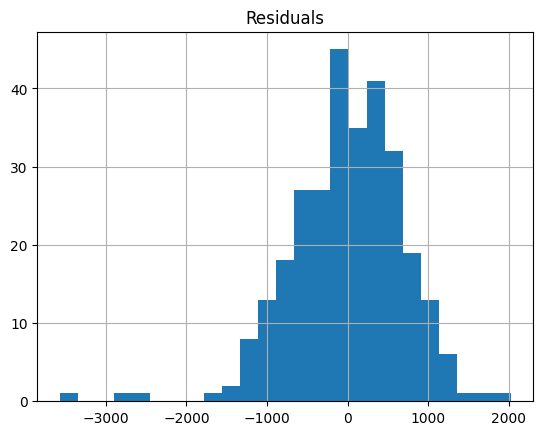

In [54]:
#Plot the residuals using a histogram
pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)
plt.show()
             
            
                                    

In [55]:
#Evaluate the model's performance on the validation set
regressionSummary(valid_y, bikes_lm.predict(valid_X_scaled))


Regression statistics

                      Mean Error (ME) : -1.8151
       Root Mean Squared Error (RMSE) : 691.9045
            Mean Absolute Error (MAE) : 527.8644
          Mean Percentage Error (MPE) : -66.1866
Mean Absolute Percentage Error (MAPE) : 80.5092


In [56]:
#Recombine the dependent and independent variables into a single dataframe
train_df = train_X.join(train_y)

In [57]:
#Run OLS Regression to get more robust stats on the training data.
predictors=train_X.columns
formula = 'registered ~ ' + ' + '.join(predictors)
bikes_lm_ols = sm.ols(formula=formula, data=train_df).fit()
bikes_lm_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     115.6
Date:                Sat, 26 Jul 2025   Prob (F-statistic):          1.93e-146
Time:                        12:01:06   Log-Likelihood:                -3453.1
No. Observations:                 438   AIC:                             6942.
Df Residuals:                     420   BIC:                             7016.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              869.2150    104.116      8.348      0.000     664.561    1073.869
season_2[T.True]      1155.0146    111.823     10.329      0.000     935.213    1374.816
season_3[T.True]      1860.5628    100.710     18.475      0.000    1662.605    2058.521
season_4[T.True]      2093.7183    111.126     18.841      0.000    1875.287    2312.150
yr_1[T.True]          1772.0023     63.446     27.929      0.000    1647.290    1896.714
mnth_3[T.True]         230.4983    133.010      1.733      0.084     -30.950     491.946
mnth_5[T.True]         645.8621    136.752      4.723      0.000     377.059     914.665
mnth_6[T.True]         688.9887    135.582      5.082      0.000     422.485     955.492
mnth_9[T.True]         447.8690    113.656      3.941      0.000     224.463     671.275
mnth_11[T.True]       -754.7317    141.197     -5.345      0.000   -1032.272    -477.192
mnth_12[T.True]       -572.5378    133.567     -4.287      0.000    -835.081    -309.994
weekday_2[T.True]       87.6779    103.905      0.844      0.399    -116.561     291.917
weekday_3[T.True]      321.0925    106.916      3.003      0.003     110.936     531.249
weekday_4[T.True]      324.5820    108.245      2.999      0.003     111.813     537.351
weekday_6[T.True]      310.6401    109.964      2.825      0.005      94.491     526.789
workingday_1[T.True]   955.3919     93.720     10.194      0.000     771.173    1139.611
weathersit_2[T.True]  -526.3187     68.905     -7.638      0.000    -661.761    -390.876
weathersit_3[T.True] -2099.5789    186.454    -11.261      0.000   -2466.078   -1733.080
==============================================================================
Omnibus:                      138.058   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              579.166
Skew:                          -1.340   Prob(JB):                    1.72e-126
Kurtosis:                       7.955   Cond. No.                         9.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Time Series Analysis

In [59]:
#Create a new column named "Date" that reformats the 'dteday' column
bikes_df['Date'] = pd.to_datetime(bikes_df.dteday)

In [60]:
#Isolate the 'registered' column and create a time series
registered_ts = pd.Series(bikes_df.registered.values, index=bikes_df.Date,
                          name='Registered')

In [61]:
#Set the index for the time series
registered_ts.index = pd.DatetimeIndex(registered_ts.index,
                                       freq=registered_ts.index.inferred_freq)

#Clear seasonality present

(0.0, 7000.0)

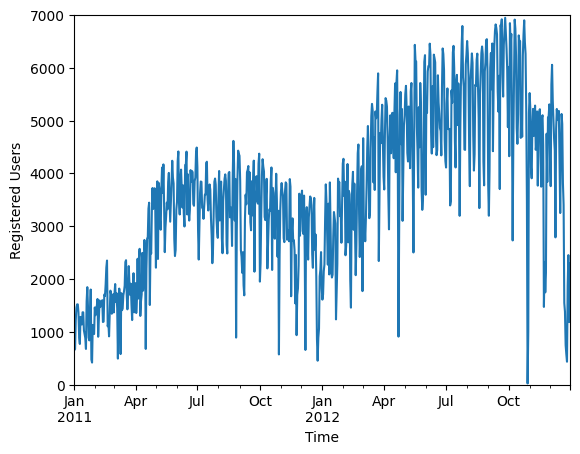

In [63]:
#Plot the time series
ax = registered_ts.plot()
ax.set_xlabel('Time')
ax.set_ylabel('Registered Users')
ax.set_ylim(0, 7000)

In [64]:
from statsmodels.tsa import tsatools

In [65]:
#Zoom in to examine only the year 2011
registered_ts_1yr = registered_ts['2011']

In [66]:
#Define the trendline and fit the data to the sm.ols model
registered_df = tsatools.add_trend(registered_ts, trend='ctt')
registered_lm = sm.ols(formula='registered_ts ~ trend + trend_squared',
                  data=registered_df).fit()

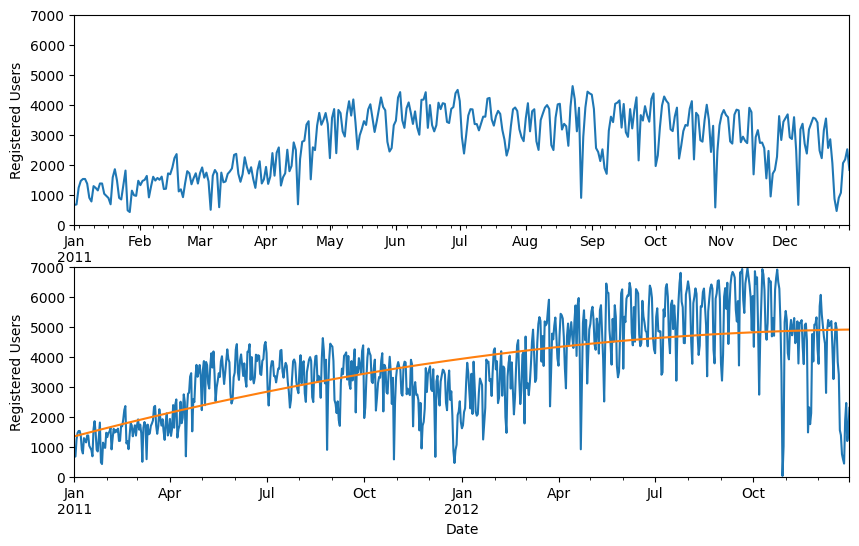

In [67]:
#Plot the zoomed-in series and the original series with a quadratic curve overlaid
fig, axes = plt.subplots(nrows=2, ncols=1, figsize =(10,6))
registered_ts_1yr.plot(ax=axes[0])
registered_ts.plot(ax=axes[1])
for ax in axes:
    ax.set_xlabel('Time')
    ax.set_ylabel('Registered Users')
    ax.set_ylim(0, 7000)
registered_lm.predict(registered_df).plot(ax=axes[1])
plt.show()

The linear model above did not account well for the seaonality of the data, so we'll try a 30-Day rolling average.

In [69]:
#Define the window for a centered average
ma_centered = registered_ts.rolling(30, center=True).mean()

In [70]:
#Define the window for a trailing averages
ma_trailing = registered_ts.rolling(30).mean()

In [71]:
ma_centered = pd.Series(ma_centered[:-1].values, index=ma_centered.index[1:])
ma_trailing = pd.Series(ma_trailing[:-1].values, index=ma_trailing.index[1:])

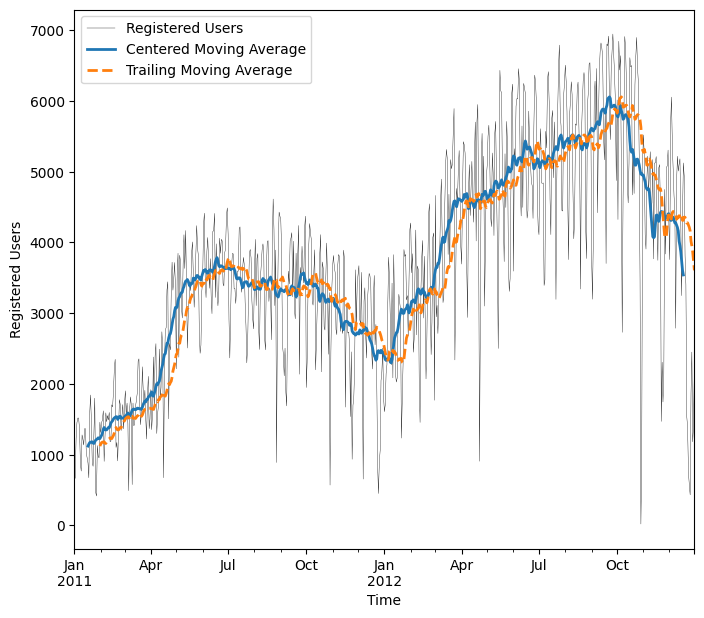

In [72]:
#Plot the original time series overlaid with both rolling averages
fix, ax = plt.subplots(figsize=(8,7))
ax = registered_ts.plot(ax=ax, color='black', linewidth=0.25)
ma_centered.plot(ax=ax, linewidth=2)
ma_trailing.plot(ax=ax, style='--', linewidth=2)
ax.set_xlabel('Time')
ax.set_ylabel('Registered Users')
ax.legend(['Registered Users', 'Centered Moving Average', 'Trailing Moving Average'])

plt.show()

In [73]:
#Import the packages necessary for exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [74]:
#Transform the data for exponential smoothing
bikes_df['Date'] = pd.date_range(start = '1/1/2011', periods = len(bikes_df), freq='D')
bikes_df.set_index('Date', inplace=True)
bikes_df.index.freq = 'D'
data_series = bikes_df['registered']

In [75]:
#Define the time series for the predictions
future_dates = pd.date_range(start = data_series.index[-1] + pd.offsets.MonthBegin(), periods=31, freq = 'D')


In [76]:
#Run the model using a smoothing level of .03
exp_smoothing_0_3_model =Holt(data_series, initialization_method='estimated').fit(smoothing_level=0.8)
exp_smoothing_0_3 = exp_smoothing_0_3_model.fittedvalues
exp_smoothing_0_3_future = exp_smoothing_0_3_model.forecast(31)

C:\Users\jacan\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [77]:
for i, prediction in enumerate(exp_smoothing_0_3_future, 1):
    print(f"Day {i} exponential smoothing prediction: {prediction:.2f}")

Day 1 exponential smoothing prediction: 2103.11
Day 2 exponential smoothing prediction: 2092.54
Day 3 exponential smoothing prediction: 2081.97
Day 4 exponential smoothing prediction: 2071.40
Day 5 exponential smoothing prediction: 2060.84
Day 6 exponential smoothing prediction: 2050.27
Day 7 exponential smoothing prediction: 2039.70
Day 8 exponential smoothing prediction: 2029.14
Day 9 exponential smoothing prediction: 2018.57
Day 10 exponential smoothing prediction: 2008.00
Day 11 exponential smoothing prediction: 1997.43
Day 12 exponential smoothing prediction: 1986.87
Day 13 exponential smoothing prediction: 1976.30
Day 14 exponential smoothing prediction: 1965.73
Day 15 exponential smoothing prediction: 1955.17
Day 16 exponential smoothing prediction: 1944.60
Day 17 exponential smoothing prediction: 1934.03
Day 18 exponential smoothing prediction: 1923.46
Day 19 exponential smoothing prediction: 1912.90
Day 20 exponential smoothing prediction: 1902.33
Day 21 exponential smoothing 

These predictions are consistent with the January figures for the previous two years.